In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
plt.style.use("seaborn")

(99, 2)
(99, 1)


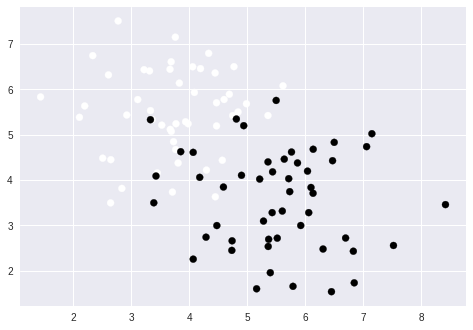

In [3]:
data_x=pd.read_csv("../assignment_datasets/Logistic_Data/logisticX.csv")
data_y=pd.read_csv("../assignment_datasets/Logistic_Data/logisticY.csv")
print(data_x.shape)
print(data_y.shape)
X,Y=np.array(data_x),np.array(data_y)
Y=Y.reshape((Y.shape[0],))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
split=int(X.shape[0]*0.8)
X_train,Y_train=X[:split,:],Y[:split]
X_test,Y_test=X[split:,:],Y[split:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(79, 2)
(79,)
(20, 2)
(20,)


In [5]:
def hypothesis(theta,x):
    return 1/(1+np.exp(-(np.dot(theta,x))))
def gradient(hyp,y,x):
    return (y-hyp)*x
def cost(X,Y,theta):
    #ones=np.ones((X.shape[0],1))
    #X=np.hstack((ones,X))
    m=X.shape[0]
    cost=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        cost+=Y[i]*np.log2(hx)+(1-Y[i])*np.log2(1-hx)
    return cost/m
def gradientascent(X,Y,learning_rate=0.001):
    theta=np.zeros((1+X.shape[1],))
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    k=0
    loss=[]
    prev_loss=0
    cur_loss=1
    while(abs(prev_loss-cur_loss)>=0.0000001):
        prev_loss=cur_loss
        for i in range(X.shape[0]):
            hyp=hypothesis(theta,X[i,:])
            for j in range(X.shape[1]):
                #print(gradient(hyp,Y[i],X[i,j]))
                theta[j] = theta[j] +learning_rate*gradient(hyp,Y[i],X[i,j])
        cur_loss=-cost(X,Y,theta)
        loss.append(-cost(X,Y,theta))
        k+=1
    return theta,loss
def accuracy(X,Y,theta):
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    cnt=0
    for i in range(X.shape[0]):
        hyp=hypothesis(theta,X[i,:])
        hyp=(hyp>=0.5)
        if(hyp==Y[i]):
            cnt+=1
    return cnt/X.shape[0]

In [6]:
def batchgradientdescent(X,Y,batches=1,learning_rate=0.001):
    theta=np.zeros((1+X.shape[1],))
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    loss=[]
    k=0
    prev_loss=0
    cur_loss=1
    batch_size=X.shape[0]/batches
    batch_size=int(batch_size)
    m=X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    while(k<5000):
        #prev_loss=cur_loss
        for b in range(batches):
            indexes = indices[b*batch_size:(b+1)*batch_size]
            for i in indexes:
                hyp=hypothesis(theta,X[i,:])
                for j in range(X.shape[1]):
                    theta[j] = theta[j] +learning_rate*gradient(hyp,Y[i],X[i,j])
            #cur_loss=-cost(X,Y,theta)
        loss.append(-cost(X,Y,theta))
        k+=1
    return theta,loss

In [7]:
theta,loss=gradientascent(X_train,Y_train)
print(theta)

[ 0.14388799  2.18459297 -2.21467019]


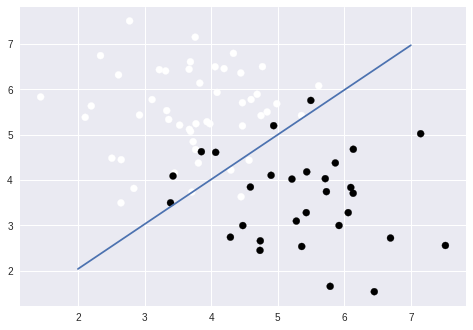

In [8]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
x=np.linspace(2,7,100)
y=(-theta[0]-theta[1]*x)/theta[2]
plt.plot(x,y)
plt.show()

0.2931943014978357


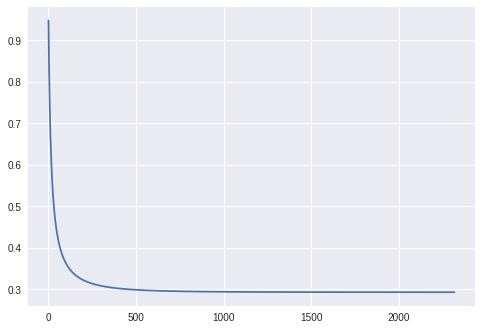

In [9]:
plt.plot(range(len(loss)),loss)
print(min(loss))
plt.show()

In [10]:
print("Training accuracy:{0:.4f}".format(accuracy(X_train,Y_train,theta)))
print("Testing accuracy:{0:.4f}".format(accuracy(X_test,Y_test,theta)))

Training accuracy:0.8861
Testing accuracy:0.9000


In [11]:
theta,loss=batchgradientdescent(X_train,Y_train)

Theta is:[ 0.22070438  2.18705415 -2.2612492 ]


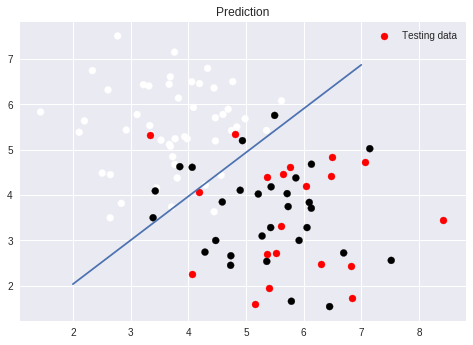

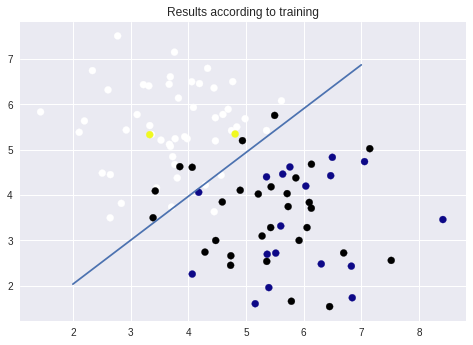

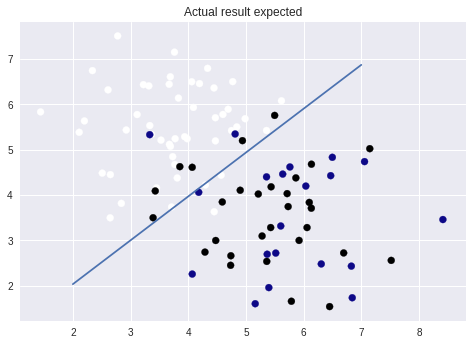

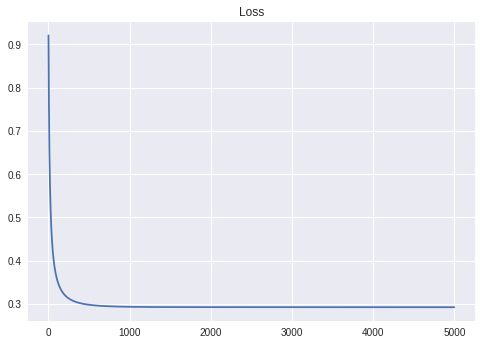

Training accuracy:0.8861
Testing accuracy:0.9000


In [12]:

print("Theta is:{}".format(theta))
plt.title("Prediction")
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.scatter(X_test[:,0],X_test[:,1],c="r",label="Testing data")
x=np.linspace(2,7,100)
y=(-theta[0]-theta[1]*x)/theta[2]
plt.plot(x,y)
plt.legend()
plt.show()
plt.title("Results according to training")
res=[]
ones=np.ones((X_test.shape[0],1))
X=np.hstack((ones,X_test))
for i in range(X.shape[0]):
    hyp=int(hypothesis(theta,X[i,:])>=0.5)
    if(Y_test[i]==hyp):
        res.append(hyp)
    else:
        res.append(3)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.scatter(X_test[:,0],X_test[:,1],c=res,cmap="plasma")
x=np.linspace(2,7,100)
y=(-theta[0]-theta[1]*x)/theta[2]
plt.plot(x,y)
plt.show()
plt.title("Actual result expected")
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test,cmap="plasma")
x=np.linspace(2,7,100)
y=(-theta[0]-theta[1]*x)/theta[2]
plt.plot(x,y)
plt.show()
plt.title("Loss")
plt.plot(range(len(loss)),loss)
plt.show()
print("Training accuracy:{0:.4f}".format(accuracy(X_train,Y_train,theta)))
print("Testing accuracy:{0:.4f}".format(accuracy(X_test,Y_test,theta)))